# Exercise 1: Logistic Regression

## Plan

1. Review linear regression in scikit-learn
2. Try to use linear regression for classification
3. Using logistic regression for classification in scikit-learn
4. Demonstrate use of logistic regression to predict survival of Titanic passengers !

## Part 1: Review of linear regression

In this exercise, we consider the glass identification dataset ([description](https://raw.githubusercontent.com/o-m-i-d/ML_exercises_2016/master/glass.names) , [data](https://raw.githubusercontent.com/o-m-i-d/ML_exercises_2016/master/glass.data)).

In [89]:
# importing glass identification dataset using pandas
import pandas as pd
glass=pd.read_table('glass.data',header=None,sep=',',names=['Id','Ri','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type of glass'],index_col='Id')#header=None 表示txt文件的第一行不是列的名字，是数据。
glass=glass.sort_values('Al')
glass.head()

,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
Id,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1


Suppose we want to predict ri, refractory index, and our only feature is al, aluminium. We can do it using linear regression. First we plot the data (ri against al) using Pandas scatter plot.

Text(0.5, 1.0, 'regression')

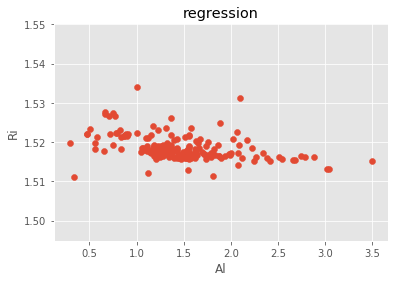

In [90]:
import matplotlib.pyplot as plt
# scatter plot using Pandas
plt.scatter(glass['Al'],glass['Ri'])
plt.xlabel('Al')
plt.ylabel('Ri')
plt.title('regression')

Then we fit a linear regression model to our data.

In [91]:
# fit a linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
model=LinearRegression()

x=glass['Al']
x=pd.DataFrame(x)
y=glass['Ri']
#X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=1234)
#model.fit(X_train,y_train)
model.fit(x,y)
# make predictions for all values of X
glass['ri_pred']=model.predict(x)

In [92]:
glass.head()

,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass,ri_pred
Id,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,1.521227
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1.521103
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,1.520682


We plot the prediction line with respect to all other data.

Text(0.5, 1.0, 'regression')

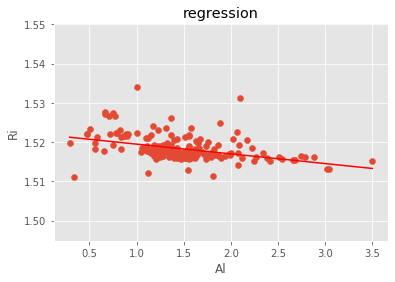

In [93]:
# put the plots together
plt.scatter(glass['Al'],glass['Ri'])
plt.plot(glass['Al'],glass['ri_pred'],c='r')
plt.xlabel('Al')
plt.ylabel('Ri')
plt.title('regression')

Remember that linear regression equation has the following form: $$y=\beta_0+\beta_1x$$

In [94]:
# compute coefficient
model.coef_

array([-0.00247761])

In [95]:
# compute intercept
model.intercept_

1.5219453302386425

In [96]:
# compute prediction for al=4 
new_x=pd.DataFrame([4],columns=['Al'])
model.predict(new_x)

array([1.5120349])

## Part 2: Predicting a categorial response using linear regression

We define a binary categorial response to predict. 

In [97]:
# examine glass_type
glass['Type of glass'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type of glass, dtype: int64

In [98]:
# types 1, 2, 3 are window glass
# types 5, 6, 7 are household glass
import numpy as np
glass=glass.rename(columns={'Type of glass':'glass_type'})
glass['household']=np.where(glass['glass_type'].values<=3,0,1)
glass.head()

,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type,ri_pred,household
Id,,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,1.521227,0
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1.521103,1
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,1.520682,0


Let's change our task, so that we're predicting **household** using **al**. Let's visualize the relationship to figure out how to do this:

Text(0, 0.5, 'household')

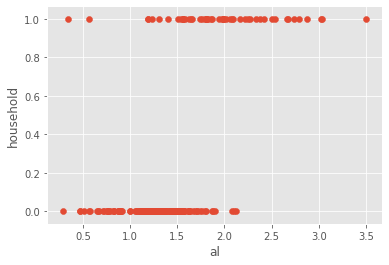

In [99]:
plt.scatter(glass.Al, glass.household)
plt.xlabel('al')
plt.ylabel('household')

Let's draw a regression line, like we did before:

In [100]:
# fit a linear regression model and store the predictions
x=glass['Al'].values.reshape(-1,1)
y=glass['household']
#X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=1234)
#model.fit(X_train,y_train)
model.fit(x,y)
# make predictions for all values of X
household_pred=model.predict(x)

Text(0, 0.5, 'household')

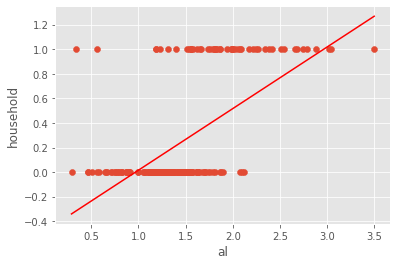

In [101]:
# scatter plot that includes the regression line
plt.scatter(glass.Al, glass.household)
plt.plot(glass.Al,household_pred,c='r')
plt.xlabel('al')
plt.ylabel('household')

If **al=3**, what class do we predict for household? **1**

If **al=1.5**, what class do we predict for household? **0**

We predict the 0 class for **lower** values of al, and the 1 class for **higher** values of al. What's our cutoff value? Around **al=2**, because that's where the linear regression line crosses the midpoint between predicting class 0 and class 1.

Therefore, we'll say that if **household_pred >= 0.5**, we predict a class of **1**, else we predict a class of **0**.

In [102]:
import numpy as np
# transform household_pred to 1 or 0
new_x=pd.DataFrame(np.array([[3],[1.5]]))
glass['household_pred']=household_pred
glass['household_pred_class']=np.where(glass['household_pred']>=0.5,1,0)
glass.head()

,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type,ri_pred,household,household_pred,household_pred_class
Id,,,,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,1.521227,0,-0.340495,0
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1.521103,1,-0.315436,0
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0,-0.250283,0
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0,-0.250283,0
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,1.520682,0,-0.230236,0


Text(0, 0.5, 'household')

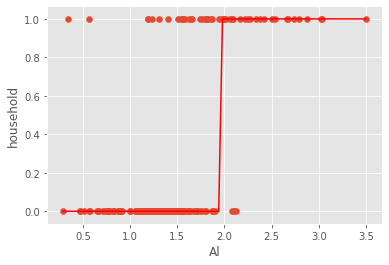

In [103]:
# plot the class predictions
plt.scatter(glass.Al, glass.household)
plt.plot(glass.Al,glass.household_pred_class,c='r')
plt.xlabel('Al')
plt.ylabel('household')

## Part 3: Using Logistic Regression Instead

Logistic regression can do just what we did:

In [104]:
# fit a logistic regression model and store the class predictions
from sklearn.linear_model import LogisticRegression
model_log=LogisticRegression()
model_log.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Text(0, 0.5, 'household')

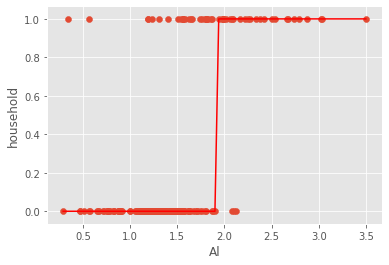

In [105]:
# plot the class predictions
y_pred_log=model_log.predict(x)
plt.scatter(glass.Al, glass.household)
plt.plot(glass.Al,y_pred_log,c='r')
plt.xlabel('Al')
plt.ylabel('household')

What if we wanted the **predicted probabilities** instead of just the **class predictions**, to understand how confident we are in a given prediction?

In [106]:
# store the predicted probabilites of class 1
x_1=x[glass['household']==1]
class1_x_pred=model_log.predict_proba(x_1)
class1_x_pred[:,0]
x_1.shape,class1_x_pred[:,0].shape

((51, 1), (51,))

Text(0, 0.5, 'household')

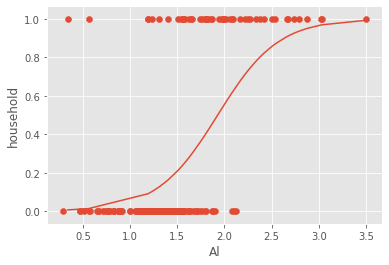

In [107]:
# plot the predicted probabilities
plt.scatter(glass.Al, glass.household)
plt.plot(x_1,class1_x_pred[:,1].reshape(-1,1))
plt.xlabel('Al')
plt.ylabel('household')

In [108]:
new_Al=np.array([[0.54],[0.45],[1.36],[2.68]])
pre_pro=pd.DataFrame(model_log.predict_proba(new_Al),columns=['class0','class1'])

The first column indicates the predicted probability of **class 0**, and the second column indicates the predicted probability of **class 1**.

### Interpreting Logistic Regression Coefficients

Remember that the probabilities returned by logistic function for class prediction are as follows:
$$p=\frac{e^{\beta_0+\beta_1x}}{1+e^{\beta_0+\beta_1x}}$$

In [109]:
# examine the coefficient for al
print('al',model_log.coef_)

al [[3.11517927]]


**Interpretation**: A 1 unit increase in 'al' is associated with a 4.18 unit increase in the log-odds of 'household' (log-odds of A is $log(\frac{P(A)}{1-P(A)})$).

In [110]:
# examine the intercept
model_log.intercept_

array([-6.00934605])

**Interpretation**: For an 'al' value of 0, the log-odds of 'household' is -7.71.

### Logistic Regression with Categorical Features

Logistic regression can still be used with **categorical features**. Let's see an example:

In [111]:
from sklearn.preprocessing import OneHotEncoder
onehot=OneHotEncoder(handle_unknown='ignore')
value=onehot.fit_transform(glass.Ba.values.reshape(-1,1)).toarray()
value.shape

(214, 34)

In [112]:
# create a categorical feature related to Barium level
dummy=pd.get_dummies(glass['Ba'].astype('category'))
data=pd.concat([glass,dummy],axis=1)
data.head()
#注意用get_dummies方法时，需要将数字型变量先转变为分类型，若用OneHotEncoder则不需要

,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type,...,1.57,1.59,1.63,1.64,1.67,1.68,1.71,2.2,2.88,3.15
Id,,,,,,,,,,,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,...,0,0,0,0,0,0,0,0,0,0
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,...,0,0,0,0,0,0,0,0,0,0
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,...,0,0,0,0,0,0,0,0,0,0
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,...,0,0,0,0,0,0,0,0,0,0
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,...,0,0,0,0,0,0,0,0,0,0


In [129]:
X=glass.Ba
y=glass['household']
data=pd.DataFrame({'Ba':X,'household':y})
data=data.sort_values(['Ba'])
model_log.fit(data['Ba'].values.reshape(-1,1),data['household'])
household_Ba_pred=model_log.predict_proba(data['Ba'].values.reshape(-1,1))

Using seaborn visualization library to draw a logistic curve:

(-0.5, 3.5)

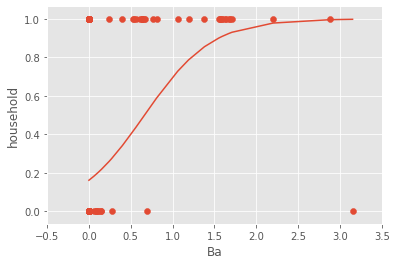

In [135]:
import seaborn as sns
plt.scatter(data['Ba'],data.household)
plt.plot(data['Ba'],household_Ba_pred[:,1])
plt.style.use('ggplot')
plt.grid(True)
plt.xlabel('Ba')
plt.ylabel('household')
plt.xlim((-0.5,3.5))


In [0]:
# categorical feature


In [0]:
# categorical feature, with jitter added


In [0]:
# fit a logistic regression model


In [0]:
# examine the coefficient for high_ba


**Interpretation:** Having a high 'ba' value is associated with a 4.43 unit increase in the log-odds of 'household' (as compared to a low 'ba' value).

## Part 4: Logistic regression with Titanic data

**Goal**: to predict the survival of the passengers of titanic based on characteristics of passengers ([description](https://raw.githubusercontent.com/o-m-i-d/ML_exercises_2016/master/titanic.names) , [data](https://raw.githubusercontent.com/o-m-i-d/ML_exercises_2016/master/titanic.data))

### Step 1: Read the data into Pandas

In [173]:
import pandas as pd
#url = 'https://raw.githubusercontent.com/o-m-i-d/ML_exercises_2016/master/titanic.data'
titanic = pd.read_table('titanic.data',sep=',',index_col='PassengerId')
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Step 2: Define features vectors and response

In [174]:
# chosen features are passenger class and number of parents/children abroad 
titanic.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)

In [159]:
titanic.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [175]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [187]:
numeric_features=['Age','Fare']
categorical_features = ['Embarked', 'Sex', 'Pclass']
numeric_transformer=Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])
categorical_transformer=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='constant',fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [181]:
numeric_transformer.fit_transform(X.loc[:,['Age','Fare']])

array([[-0.56573646, -0.50244517],
       [ 0.66386103,  0.78684529],
       [-0.25833709, -0.48885426],
       ...,
       [-0.1046374 , -0.17626324],
       [-0.25833709, -0.04438104],
       [ 0.20276197, -0.49237783]])

In [186]:
categorical_transformer.fit_transform(X.loc[:,categorical_features]).toarray()

array([[0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.]])

### Step 3: Split the data into training and testing sets for cross validation

In [191]:
from sklearn.model_selection import train_test_split
X=titanic.iloc[:,1:]
y=titanic.Survived
X=preprocessor.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Step 4: Fit a logistic regression model and obtain the coefficients

In [193]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train, y_train)
feature_cols=titanic.columns[1:]
zipped=zip(feature_cols, logreg.coef_[0])
list(zipped)

[('Pclass', -0.4777013171835948),
 ('Sex', -0.01247583538302134),
 ('Age', 0.22248869146222086),
 ('SibSp', 0.04319632808488289),
 ('Parch', -0.4424172107983543),
 ('Fare', 0.17675177979292642),
 ('Embarked', 1.2555771236786275)]

### Step 5: Make predictions on the testing set and calculate its accuracy

In [194]:
# class predictions (not predicted probabilities)
class_pre=logreg.predict(X_test)

In [199]:
# calculate classification accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test,class_pre))
print(logreg.score(X_test,y_test))

0.7892376681614349
0.7892376681614349


### Step 6: Compare the test accuracy with the null accuracy

In [239]:
print(max(y_test.mean(), 1 - y_test.mean()))
print(pd.Series(class_pre).value_counts())
print(max(class_pre.mean(),1-class_pre.mean()))

0.5739910313901345
0    141
1     82
dtype: int64
0.6322869955156951


### Confusion matrix of Titanic survival predictions

Text(33.0, 0.5, 'predict')

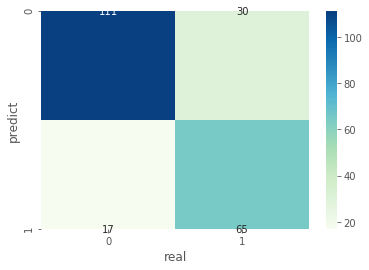

In [244]:
# print confusion matrix
cm=pd.crosstab(class_pre,y_test)
sns.heatmap(cm,annot=cm,cmap='GnBu',fmt='d')
#annot=True表示在热力图的每个单元上显示数值，fmt指定单元格中数据的显示格式。
plt.xlabel('real')
plt.ylabel('predict')

In [241]:
metrics.confusion_matrix(y_test,class_pre)

array([[111,  17],
       [ 30,  65]], dtype=int64)

In [245]:
# save confusion matrix and slice into four pieces
cm.values.reshape(4,1)
TP=65
FN=30
FP=17
TN=111

In [246]:
# calculate the sensitivity sensitivity表示正确预测的正例数在实际正例中的比例
print (TP / float(TP + FN))

0.6842105263157895


In [247]:
# calculate the specificity specificity表示正确预测的负例数在实际负例数中的比例。
print (TN / float(TN + FP))

0.8671875


In [248]:
prop_pre.shape

(223, 2)

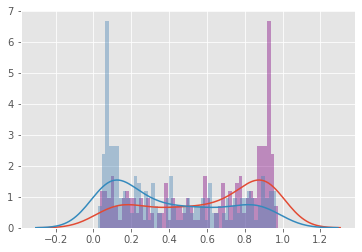

In [249]:
# store the predicted probabilities
prop_pre=logreg.predict_proba(X_test)
# histogram of predicted probabilities
sns.distplot(prop_pre[:,0],hist=True,bins=50,hist_kws={'color':'purple'},label='负例')
sns.distplot(prop_pre[:,1],hist=True,bins=50,hist_kws={'color':'steelblue'},label='正例')

In [250]:
# increase sensitivity by lowering the threshold for predicting survival
import numpy as np
y_pred_class = np.where(class_pre > 0.3, 1, 0)

In [251]:
# old confusion matrix
print (cm)

Survived    0   1
row_0            
0         111  30
1          17  65


In [253]:
# new confusion matrix
print (metrics.confusion_matrix(y_test, y_pred_class))

[[111  17]
 [ 30  65]]


In [261]:
# new sensitivity (higher than before)
print (65 / float(65 + 30))

0.6842105263157895


In [262]:
# new specificity (lower than before)
print (111 / float(111 + 17))

0.8671875


In [263]:
# calculate classification accuracy with new threshold
print (metrics.accuracy_score(y_test, y_pred_class))

0.7892376681614349
